In [9]:
import pandas as pd 
import matplotlib as plt 
import numpy as np 
import seaborn as sns

In [10]:
trial_data = pd.read_csv('../data/data_trials_0.csv')
movement_data = pd.read_csv('../data/data_movements_0.csv')

In [11]:
#set trials to match for both data frames 
trial_data['trial'] = trial_data.trial - 1

df = movement_data[['x', 'y', 'time', 'trial', 'state']]

# Desired timestamp granularity
timestamp_granularity = 0.001

# Create an empty list to store interpolated dataframes
interpolated_dfs = []

# Iterate through the rows of the original DataFrame
for i in range(len(df) - 1):
    # Extract data from the current and next rows
    current_row = df.iloc[i]
    next_row = df.iloc[i + 1]

    # Calculate the time points for interpolation
    t1 = current_row["time"]
    t2 = next_row["time"]

    # Calculate the number of points to interpolate between t1 and t2
    num_points = int((t2 - t1) / timestamp_granularity)

    # Create an array of interpolated time points
    interpolated_times = np.linspace(t1, t2, num_points + 1)

    # Perform linear interpolation for 'x' and 'y' columns
    interpolated_x = np.interp(interpolated_times, [t1, t2], [current_row["x"], next_row["x"]])
    interpolated_y = np.interp(interpolated_times, [t1, t2], [current_row["y"], next_row["y"]])

    # Create a new DataFrame for this segment of interpolation
    interpolated_segment = pd.DataFrame({
        "x": interpolated_x,
        "y": interpolated_y,
        "time": interpolated_times,
        "trial": [current_row["trial"]] * (num_points + 1),  # Include trial number
        "state": [current_row["state"]] * (num_points + 1)  # Include state
    })

    # Append the interpolated segment to the list
    interpolated_dfs.append(interpolated_segment)

# Concatenate all interpolated segments into one DataFrame
interpolated_df = pd.concat(interpolated_dfs, ignore_index=True)

# Print the interpolated DataFrame
interpolated_df

,x,y,time,trial,state
0,-0.564621,8.598031,8.502177,0,search_ring
1,-0.566012,8.581969,8.503229,0,search_ring
2,-0.567404,8.565906,8.504281,0,search_ring
3,-0.568796,8.549843,8.505333,0,search_ring
4,-0.570188,8.533781,8.506385,0,search_ring
...,...,...,...,...,...
2017137,1.572082,12.496167,1974.562271,299,iti
2017138,1.572109,12.495912,1974.563277,299,iti
2017139,1.572135,12.495657,1974.564283,299,iti
2017140,1.572162,12.495402,1974.565289,299,iti


<Axes: xlabel='x', ylabel='y'>

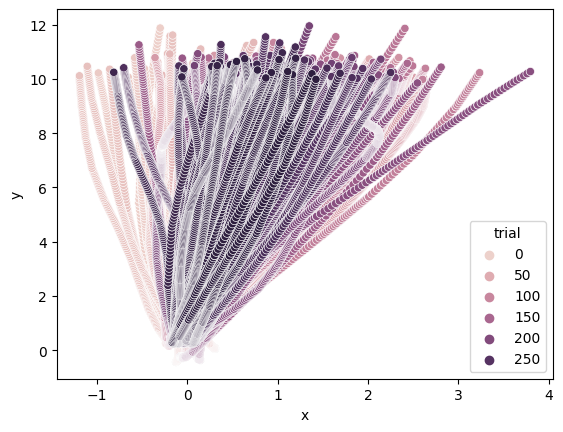

In [12]:
sns.scatterplot(data = interpolated_df.loc[interpolated_df.state == 'reach'], x = 'x', y = 'y', hue = 'trial')

In [13]:
combined_data = pd.merge(trial_data, movement_data, on = 'trial', how = 'left')
combined_data

,Unnamed: 0_x,cursor_vis,midpoint_vis,endpoint_vis,cursor_sig,cursor_mp_sig,cursor_ep_sig,clamp,rot,trial,...,unlimited_uncertainty,endpoint_theta,movement_time,movement_initiation_time,Unnamed: 0_y,state,sample,time,x,y
0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,85.529673,0.148947,0.435249,0,search_ring,510,8.502177,-0.564621,8.598031
1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,85.529673,0.148947,0.435249,1,search_ring,511,8.516904,-0.584106,8.373156
2,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,85.529673,0.148947,0.435249,2,search_ring,512,8.533916,-0.597711,8.179462
3,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,85.529673,0.148947,0.435249,3,search_ring,513,8.550891,-0.602258,8.015866
4,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,85.529673,0.148947,0.435249,4,search_ring,514,8.566930,-0.601180,7.852718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103989,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299,...,0.0,81.894757,0.116772,0.317194,248,iti,118399,1974.499200,1.564596,12.534089
103990,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299,...,0.0,81.894757,0.116772,0.317194,249,iti,118400,1974.515179,1.566614,12.520043
103991,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299,...,0.0,81.894757,0.116772,0.317194,250,iti,118401,1974.532200,1.570117,12.507397
103992,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299,...,0.0,81.894757,0.116772,0.317194,251,iti,118402,1974.548188,1.571712,12.499733


In [15]:
def cart2pol(x, y):
    r = []
    theta = []
    for i in range(len(x)): 
        r.append(np.sqrt((x[i])**2 + (y[i])**2))
        theta.append(np.arctan2(y[i], x[i]))
    return(r, theta)


reach_x = combined_data.x.values
reach_y  = combined_data.y.values

r, theta = cart2pol(reach_x, reach_y)

combined_data['r'] = r 
combined_data['theta'] = theta
combined_data

,Unnamed: 0_x,cursor_vis,midpoint_vis,endpoint_vis,cursor_sig,cursor_mp_sig,cursor_ep_sig,clamp,rot,trial,...,movement_time,movement_initiation_time,Unnamed: 0_y,state,sample,time,x,y,r,theta
0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.148947,0.435249,0,search_ring,510,8.502177,-0.564621,8.598031,8.616550,1.636371
1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.148947,0.435249,1,search_ring,511,8.516904,-0.584106,8.373156,8.393504,1.640443
2,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.148947,0.435249,2,search_ring,512,8.533916,-0.597711,8.179462,8.201272,1.643741
3,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.148947,0.435249,3,search_ring,513,8.550891,-0.602258,8.015866,8.038459,1.645789
4,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.148947,0.435249,4,search_ring,514,8.566930,-0.601180,7.852718,7.875697,1.647204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103989,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299,...,0.116772,0.317194,248,iti,118399,1974.499200,1.564596,12.534089,12.631364,1.446611
103990,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299,...,0.116772,0.317194,249,iti,118400,1974.515179,1.566614,12.520043,12.617677,1.446315
103991,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299,...,0.116772,0.317194,250,iti,118401,1974.532200,1.570117,12.507397,12.605564,1.445915
103992,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299,...,0.116772,0.317194,251,iti,118402,1974.548188,1.571712,12.499733,12.598159,1.445713


Temp comment: 
next convert co-ordinates into polar co-ordinates
append r and theta columns 
check for theta at r = 2 per trial, check if there is 1 per trial or if there are multiple or none or mixed. 
There are multiple. 

Try average reach time? Divide it by ??? 


Want length of reach in time for each reach

In [28]:
time = combined_data.iloc[combined_data.time]


,Unnamed: 0_x,cursor_vis,midpoint_vis,endpoint_vis,cursor_sig,cursor_mp_sig,cursor_ep_sig,clamp,rot,trial,...,movement_time,movement_initiation_time,Unnamed: 0_y,state,sample,time,x,y,r,theta
8,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.148947,0.435249,8,search_ring,518,8.633933,-0.559928,7.109571,7.131586,1.649391
8,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.148947,0.435249,8,search_ring,518,8.633933,-0.559928,7.109571,7.131586,1.649391
8,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.148947,0.435249,8,search_ring,518,8.633933,-0.559928,7.109571,7.131586,1.649391
8,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.148947,0.435249,8,search_ring,518,8.633933,-0.559928,7.109571,7.131586,1.649391
8,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.148947,0.435249,8,search_ring,518,8.633933,-0.559928,7.109571,7.131586,1.649391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,...,0.116921,0.550241,311,feedback,2781,46.384180,-0.911548,11.504630,11.540686,1.649864
1974,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,...,0.116921,0.550241,311,feedback,2781,46.384180,-0.911548,11.504630,11.540686,1.649864
1974,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,...,0.116921,0.550241,311,feedback,2781,46.384180,-0.911548,11.504630,11.540686,1.649864
1974,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,...,0.116921,0.550241,311,feedback,2781,46.384180,-0.911548,11.504630,11.540686,1.649864
